In [1]:
from glob import glob 
from pccloner.pctask import Preprocessing   #version0.0.15
import pandas as pd

preprocessing = Preprocessing(length_th = 5, minpixels_th = 1, dt_th = 0.22, maxpixels_th = 0)
csvpaths = glob('sample*/*.csv')

a_samples = [preprocessing.run(pd.read_csv(csvpath)) for csvpath in csvpaths]
counter = 0
for csvpath, a_sample in zip(csvpaths, a_samples):
    print(csvpath, len(a_sample))
    counter += len(a_sample)

print('total =', counter)
#############################
a_samples = [a_samples[-1]]
##################################
a_samples[0]
#config['MAX_LENGTH'] = 50  #steps

sample1/raw_pcdata.csv 29
sample1/rawpcdata_temp.csv 29
total = 58


,timestamp,img_path,px,py,event,trajectory,drag2px,drag2py,delay
0,1.503875,data/sample1/screen0000000000_1.46115556498989...,46,151,Button.left,"[(0.525089313974604, 558, 430), (0.52519813203...",None,None,1.731885
1,3.235760,data/sample1/screen0000000002_3.19259158708155...,1759,53,Button.left,"[(1.9666909971274436, 47, 151), (1.96728546312...",None,None,1.094073
2,4.329833,data/sample1/screen0000000004_4.27942154998891...,1462,89,Button.left,"[(3.652169305132702, 1759, 54), (3.67717012297...",None,None,0.662488
3,4.992321,data/sample1/screen0000000006_4.94447949598543...,1462,89,h,[],None,None,0.112900
4,5.105221,data/sample1/screen0000000007_5.05891285906545...,1462,89,o,[],None,None,0.176890
5,5.282111,data/sample1/screen0000000010_5.23166353395208...,1462,89,l,[],None,None,0.419156
6,5.701267,data/sample1/screen0000000012_5.65752384997904...,1462,89,a,[],None,None,0.202323
7,5.903590,data/sample1/screen0000000014_5.86152701009996...,1462,89,Key.space,[],None,None,0.171795
8,6.075385,data/sample1/screen0000000016_6.03321892907843...,1462,89,e,[],None,None,0.174145
9,6.249530,data/sample1/screen0000000018_6.2039102059789.jpg,1462,89,r,[],None,None,0.111460


In [2]:
def get_action_tokens(samples): 
    tokens = set()
    for sample in samples:
        tokens.update(sample['event'].unique().tolist())
    tokens = list(tokens)
    tokens.sort()
    tokens.insert(0,'no_action')
    return tokens

config = {}
config['VOC_ACTIONS'] = get_action_tokens(a_samples) 

print(len(config['VOC_ACTIONS']))
for a in config['VOC_ACTIONS']:
    print(a)


14
no_action
Button.left
Key.enter
Key.space
a
e
g
h
i
k
l
m
o
r


In [3]:
imgpaths = glob('sample*/*.jpg')
print("Number of screenshots", len(imgpaths))
from PIL import Image
from tqdm import tqdm 

sizes = []
for imgpath in tqdm(imgpaths):
    img = Image.open(imgpath)
    sizes.append(img.size)
sizes = list(set(sizes))
print(sizes)

config['MAXWIDTH_screenshoot'] = sizes[0][0]  #pixels
config['MAXHEIGHT_screenshoot'] = sizes[0][1] #pixels


Number of screenshots 58


  0%|          | 0/58 [00:00<?, ?it/s]

100%|██████████| 58/58 [00:00<00:00, 3393.83it/s]

[(1920, 1080)]


29 29
width: max =  1835 min = 46
height: max =  314 min = 44


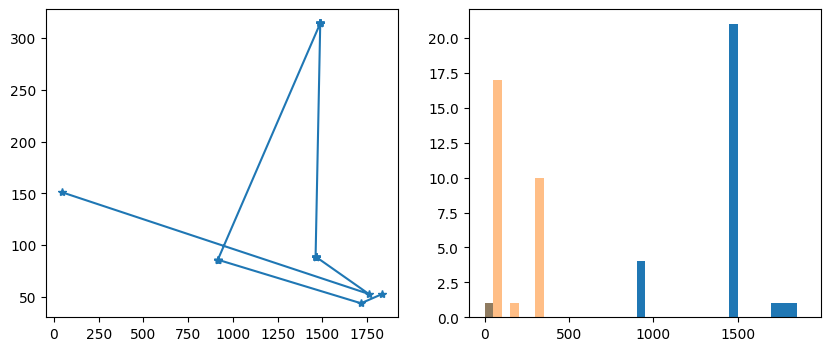

In [4]:
import numpy as np

px, py = [], []
for a_sample in a_samples:
    px += list(a_sample['px'])
    py += list(a_sample['py'])
px = np.asarray(px)
py = np.asarray(py)

import matplotlib.pyplot as plt
print(len(px), len(py))
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(px, py, '-*')
plt.subplot(122)
plt.hist(px, bins=np.arange(0,1920,50))
plt.hist(py, bins=np.arange(0,1080,50), alpha=0.5)

print('width: max = ', px.max(), 'min =', px.min())
print('height: max = ', py.max(), 'min =', py.min())


28
delay: max =  2.887112942989914 min = 0.1114598719868809 mean = 0.5658077869281571


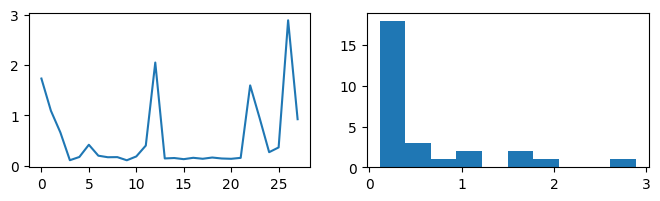

28
delay: max =  2.887112942989914 min = 0.1114598719868809 mean = 0.5658077869281571


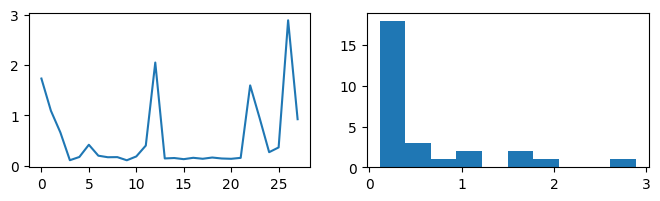

23
delay: max =  0.9462387908715737 min = 0.1114598719868809 mean = 0.2819158647857282


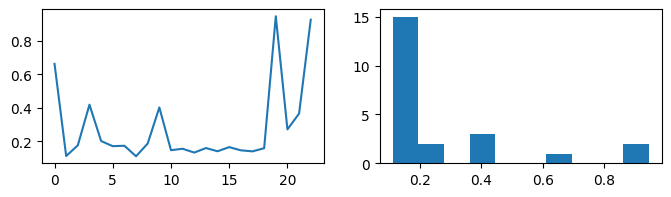

0


ValueError: zero-size array to reduction operation maximum which has no identity

In [5]:
delay = []
for a_sample in a_samples:
    delay += list(a_sample['delay'][:-1])  # Delete the last zero-value delay in each a_sample
delay = np.asarray(delay)

for cut in [10000, 100, 1, 0.1]: 
    d = delay[delay <= cut]
    print(d.shape[0])
    print('delay: max = ', d.max(), 'min =', d.min(), 'mean =', d.mean())
    plt.figure(figsize=(8,2))
    plt.subplot(121)
    plt.plot(d, '-')
    plt.subplot(122)
    plt.hist(d)
    plt.show()

# Hay algunos tiempos de espera muy largos y muchos muy cortos 

config['MAXDELAY'] =  delay.max()
